In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
def get_option_termination_states(options, states, n_options=4):
    termination_states = {x: [] for x in range(n_options)}
    for episode in range(len(options)):
        option_trajectory = options[episode]
        for i in range(len(option_trajectory)-1):
            if option_trajectory[i] != option_trajectory[i+1]:
                term_state = states[episode][i-1]
#                 if term_state not in termination_states[option_trajectory[i]]:
                termination_states[option_trajectory[i]].append(term_state)
    return termination_states


def coords_to_onehot(coords, boundaries):
    dim = np.prod(boundaries)
    w, h = boundaries
    x = np.zeros(dim)
    idx = coords[0] * w + coords[1]  # this should be w !!!!!!
    x[idx] = 1
    return x


In [3]:
def load_episode_data(directory, exclude=None):
    files = [f for f in os.listdir(directory) if os.path.isfile(directory+f)]
    episode_data = pd.DataFrame()
    for f in files:
        episode_data = episode_data.append(pd.read_pickle(directory+f), ignore_index=True)
    episode_data = episode_data.sort_values('episode')
    episode_data = episode_data.reset_index(drop=True)
    episode_data.episode = [int(x) for x in episode_data.episode]
#     episode_data = episode_data[['episode', 'action', 'reward', 'state', 'logprob', 'mask']]
    return episode_data

In [4]:
def get_terms(terminations, coords, options, n_options=4):
    termination_states = {x: [] for x in range(n_options)}
    for i, episode in enumerate(terminations):
        for j, term in enumerate(episode):
            if term and j > 0:
                termination_states[options[i][j-1]].append(coords[i][j])
    return termination_states

In [5]:
def unpack_env_data(df):
    keys = list(df.env_data)[0][0].keys()
    for k in keys:
        df[k] = [[x[k] for x in y] for y in df.env_data]
    return df

In [6]:
def simulate_step(df, episode, current_idx):
    for key, item in df.env_data[episode][current_idx].items():
        print('{}: {}'.format(key, item))
    print('action: {}'.format(df.action[episode][current_idx]))
    print('reward: {}'.format(df.reward[episode][current_idx]))
    return current_idx + 1

In [17]:
df = load_episode_data('../../experiments/8_options_ppoc_fourrooms/evaluate/episodes/')

In [18]:
df['total_reward'] = [np.sum(x) for x in df.reward]

In [19]:
df

,action,action_logprob,env_data,episode,mask,option,option_logprob,reward,state,term_prob,terminate,total_reward
0,"[1, 1, 1, 1, 1, 3, 1]","[-0.25184762477874756, -0.9037373661994934, -0...","[{'coords': (5, 8)}, {'coords': (6, 8)}, {'coo...",1,"[1, 1, 1, 1, 1, 1, 0]","[0, 0, 0, 0, 0, 0, 0]","[-1.7662603855133057, -1.924955129623413, -1.9...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 100.0]","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[4.0322647691937163e-05, 0.000156576032168231...","[0, 0, 0, 0, 0, 0, 0]",94.0
1,"[1, 3, 3, 3, 3, 0, 3, 3, 0, 0, 3, 3, 0]","[-1.7611863613128662, -0.6915369033813477, -1....","[{'coords': (10, 2)}, {'coords': (11, 2)}, {'c...",2,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[-2.2926697731018066, -1.5419942140579224, -1....","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0001521002996014431, 0.0004985194536857307...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",88.0
2,"[1, 1, 1]","[-0.19087344408035278, -0.5451775193214417, -0...","[{'coords': (4, 9)}, {'coords': (5, 9)}, {'coo...",3,"[1, 1, 0]","[0, 0, 0]","[-1.5780562162399292, -2.0553641319274902, -1....","[-1.0, -1.0, 100.0]","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[7.502372318413109e-05, 0.0002530448837205767...","[0, 0, 0]",98.0
3,"[3, 1]","[-0.5990142822265625, -0.1288222223520279]","[{'coords': (6, 8)}, {'coords': (6, 9)}]",4,"[1, 0]","[0, 0]","[-1.924955129623413, -1.4955039024353027]","[-1.0, 100.0]","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[7.860718324081972e-05, 0.0002675144351087510...","[0, 0]",99.0
4,"[1, 3, 3, 3, 3, 2, 2, 3, 0, 3, 0, 2, 3, 0]","[-0.4603264629840851, -0.11490554362535477, -0...","[{'coords': (9, 5)}, {'coords': (10, 5)}, {'co...",5,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[-1.9377822875976562, -1.298773169517517, -1.8...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[5.960436465102248e-05, 0.0002608401991892606...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",87.0
5,"[3, 3, 3, 0, 1, 1, 1, 1, 1, 3, 1]","[-0.17696794867515564, -0.6398178935050964, -1...","[{'coords': (3, 5)}, {'coords': (3, 6)}, {'coo...",6,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[-1.1454918384552002, -1.8076726198196411, -1....","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[3.8526839489350095e-05, 0.000140107818879187...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",90.0
6,"[3, 1, 3, 1, 1, 3, 2, 3, 0, 1, 2, 3, 2, 3, 2, ...","[-0.5955822467803955, -0.24057555198669434, -1...","[{'coords': (2, 7)}, {'coords': (2, 8)}, {'coo...",7,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-1.8876229524612427, -1.2155177593231201, -1....","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.00012853328371420503, 0.000544770678970962...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",82.0
7,"[1, 2, 1]","[-0.38470497727394104, -0.3798365592956543, -0...","[{'coords': (5, 10)}, {'coords': (6, 10)}, {'c...",8,"[1, 1, 0]","[0, 0, 0]","[-1.7186460494995117, -1.3462694883346558, -1....","[-1.0, -1.0, 100.0]","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[8.379802602576092e-05, 0.0003073659900110215...","[0, 0, 0]",98.0
8,"[3, 3, 3, 0, 1, 1, 1, 2, 1, 1, 0, 1, 2, 3, 1, ...","[-0.28024357557296753, -0.17696794867515564, -...","[{'coords': (3, 4)}, {'coords': (3, 5)}, {'coo...",9,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-2.140589475631714, -1.1454918384552002, -1.8...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[5.452393088489771e-05, 0.0001950908481376245...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [40]:
df = unpack_env_data(df)

In [20]:
df.head()

,action,action_logprob,env_data,episode,mask,option,option_logprob,reward,state,term_prob,terminate,total_reward
0,"[1, 1, 1, 1, 1, 3, 1]","[-0.25184762477874756, -0.9037373661994934, -0...","[{'coords': (5, 8)}, {'coords': (6, 8)}, {'coo...",1,"[1, 1, 1, 1, 1, 1, 0]","[0, 0, 0, 0, 0, 0, 0]","[-1.7662603855133057, -1.924955129623413, -1.9...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 100.0]","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[4.0322647691937163e-05, 0.000156576032168231...","[0, 0, 0, 0, 0, 0, 0]",94.0
1,"[1, 3, 3, 3, 3, 0, 3, 3, 0, 0, 3, 3, 0]","[-1.7611863613128662, -0.6915369033813477, -1....","[{'coords': (10, 2)}, {'coords': (11, 2)}, {'c...",2,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[-2.2926697731018066, -1.5419942140579224, -1....","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0001521002996014431, 0.0004985194536857307...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",88.0
2,"[1, 1, 1]","[-0.19087344408035278, -0.5451775193214417, -0...","[{'coords': (4, 9)}, {'coords': (5, 9)}, {'coo...",3,"[1, 1, 0]","[0, 0, 0]","[-1.5780562162399292, -2.0553641319274902, -1....","[-1.0, -1.0, 100.0]","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[7.502372318413109e-05, 0.0002530448837205767...","[0, 0, 0]",98.0
3,"[3, 1]","[-0.5990142822265625, -0.1288222223520279]","[{'coords': (6, 8)}, {'coords': (6, 9)}]",4,"[1, 0]","[0, 0]","[-1.924955129623413, -1.4955039024353027]","[-1.0, 100.0]","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[7.860718324081972e-05, 0.0002675144351087510...","[0, 0]",99.0
4,"[1, 3, 3, 3, 3, 2, 2, 3, 0, 3, 0, 2, 3, 0]","[-0.4603264629840851, -0.11490554362535477, -0...","[{'coords': (9, 5)}, {'coords': (10, 5)}, {'co...",5,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[-1.9377822875976562, -1.298773169517517, -1.8...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[5.960436465102248e-05, 0.0002608401991892606...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",87.0


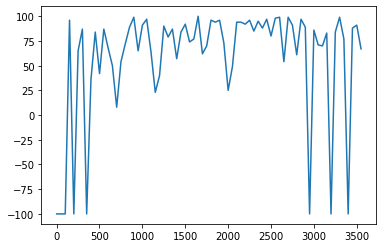

In [42]:
every=50
plt.plot(df.episode[::every], df.total_reward[::every])

In [43]:
T = get_terms(df.terminate, df.coords, df.option)

In [19]:
df['coords'] = [[x['coords'] for x in y] for y in df.env_data]

In [33]:
term_states = get_option_termination_states(list(df.option)[15000:], list(df.coords)[15000:])

In [77]:
len(term_states)

4

In [44]:
def plot_treads(coords, gridsize):
    grid = np.zeros(gridsize)
    for episode in coords:
        for state in episode:
            grid[state[0], state[1]] += 1
    return grid

In [45]:
inits = [[x[0]] for x in df.coords]
G = plot_treads(inits, (5,5))

IndexError: index 5 is out of bounds for axis 0 with size 5

In [55]:
init_dir = [x[0] for x in df.direction]

In [34]:
dirs = [y for x in df.direction for y in x]

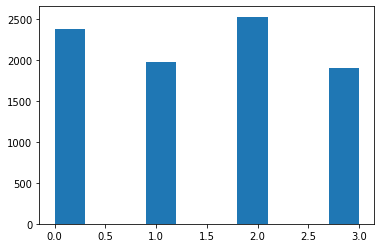

In [27]:
plt.hist(init_dir);

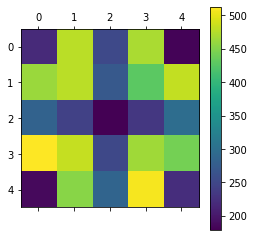

In [57]:
plt.matshow(G)
plt.colorbar()

In [46]:
def termination_grids(term_states, gridsize):
    n_options = len(term_states)
    grids = {x: np.zeros(gridsize) for x in range(n_options)}
    for o in range(n_options):
        for s in term_states[o]:
            grids[o][s] += 1
    return grids

In [47]:
grids = termination_grids(T, (13,13))

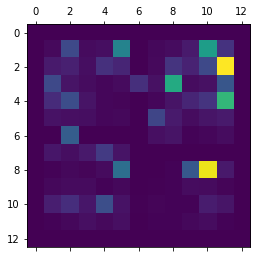

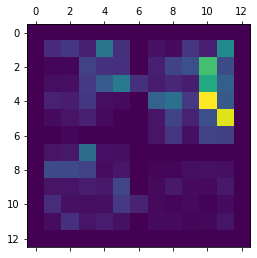

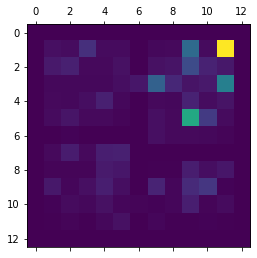

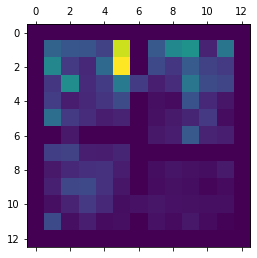

In [48]:
for i,grid in grids.items():
    plt.matshow(grid)

In [130]:
def plot_option_trajectory_grid(coords, options):
    grid = np.ones((13,13)) * -1
    coords_counts = {x: len([y for y in coords if y == x]) for x in set(coords)}
    for i, c in enumerate(coords):
        grid[c[0], c[1]] = options[i] + 1 + .9 / coords_counts[c]
        coords_counts[c] += 1
    return grid
        

In [121]:
idx = 3105

In [145]:
g = plot_option_trajectory_grid(df.coords[idx], df.option[idx])
idx+=1

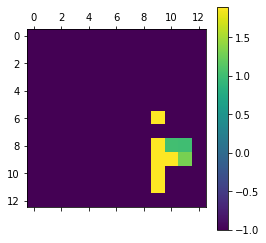

In [146]:
plt.matshow(g)
plt.colorbar()

In [147]:
idx

3117

In [7]:
from envs import FourRooms

In [8]:
env = FourRooms()

In [161]:
states_list = []
actions = []
state = env.reset()
states_list.append(env.currentcell)
for i in range(100):
    action = np.random.randint(4)
    actions.append(action)
    state = env.step(action)
    states_list.append(env.currentcell)

In [162]:
diff = []
for i in range(len(states_list)-1):
    diff.append(tuple(np.array(states_list[i+1])-np.array(states_list[i])))

In [163]:
valid_possibilities = [(1,0), (0,0), (0,1), (-1,0), (0,-1)]

In [164]:
[i for i,x in enumerate(diff) if x == (0,0)]

[8, 17, 18, 19, 20, 34, 35, 39, 44, 47, 50, 51, 75, 79, 89]

In [174]:
states_list[34]

(8, 1)

In [167]:
actions[8]

0

In [169]:
actions[9]

2

In [155]:
def plot_traj(coords):
    grid = np.zeros((13,13))
    for c in coords:
        grid[c[0], c[1]] += 1
        
    return grid

In [171]:
g = plot_traj(states_list)

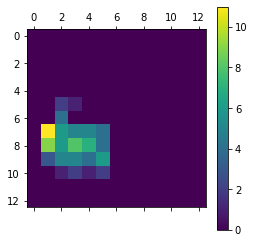

In [172]:
plt.matshow(g)
plt.colorbar()

In [149]:
len(states_list)

101